In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\project Deployment Excelr\SVM\SVM\mushroom.csv", index_col = 0)
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [5]:
data.shape

(2000, 25)

In [7]:
data = data.reset_index(drop=True)
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [9]:
data.duplicated().sum()

1024

In [11]:
data.drop_duplicates(keep = 'first', inplace = True)

In [13]:
data.isnull().sum()


cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [15]:
data.reset_index(drop = 'first', inplace = True)

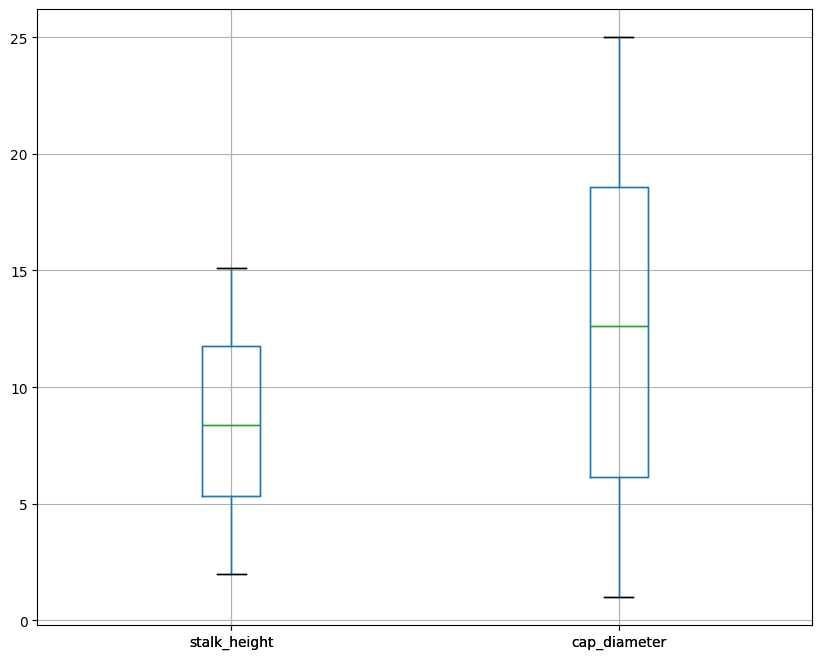

In [19]:
data.boxplot()
plt.show()

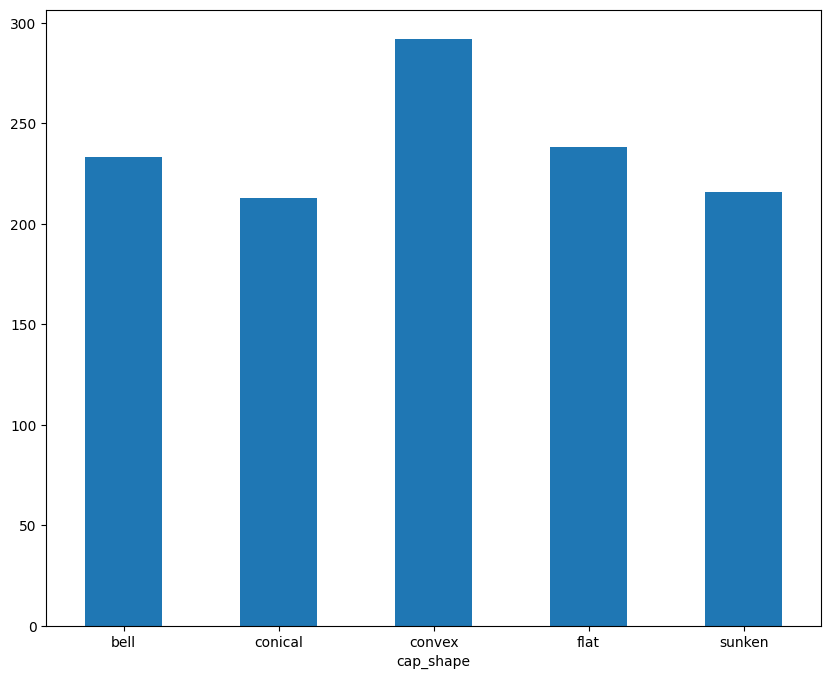

In [25]:
data['cap_shape'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

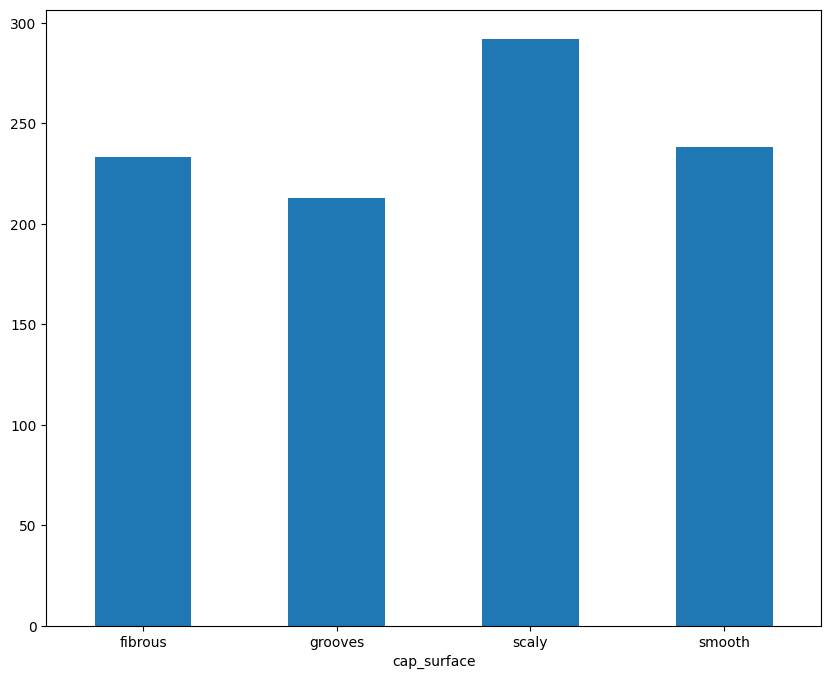

In [27]:
data['cap_surface'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

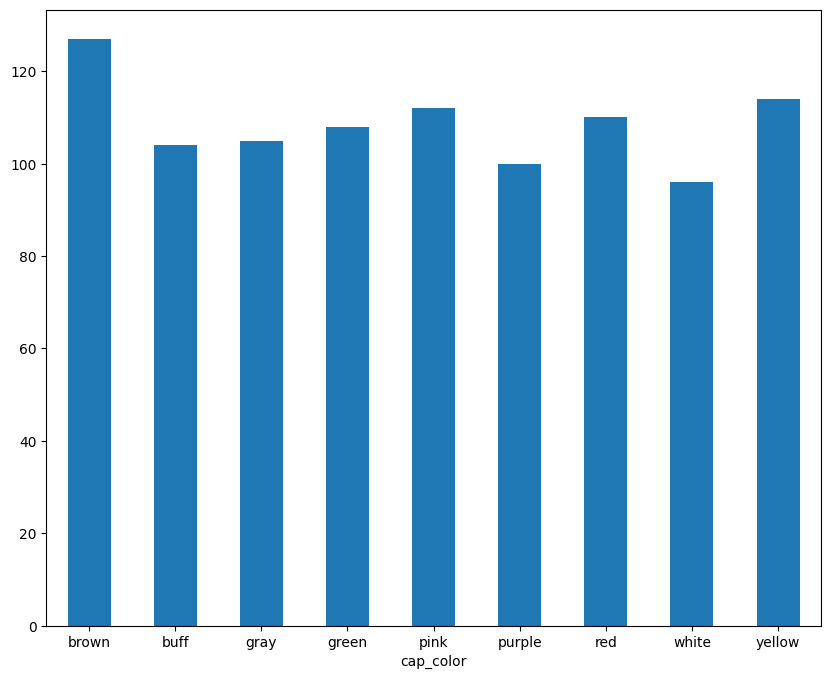

In [29]:
data['cap_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

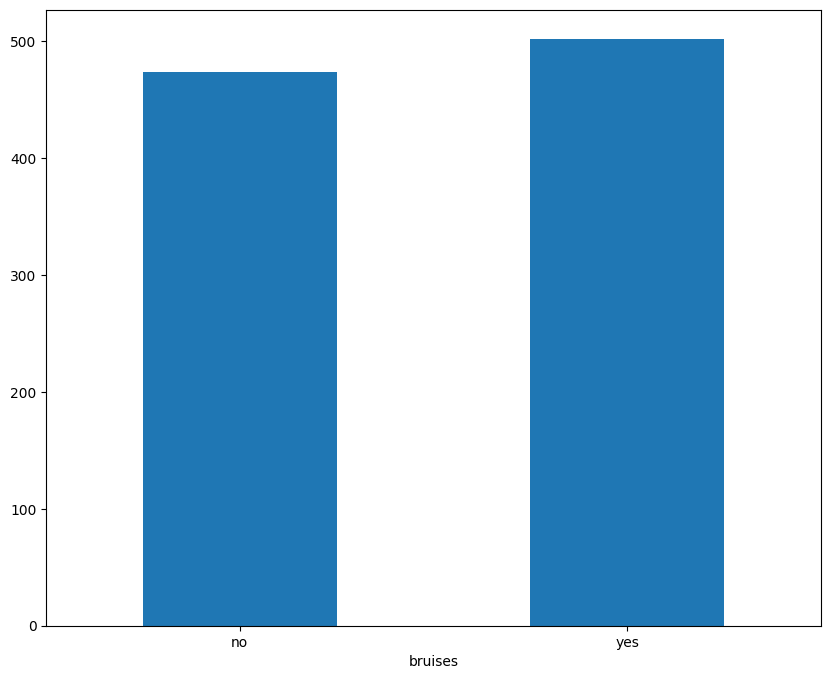

In [31]:
data['bruises'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

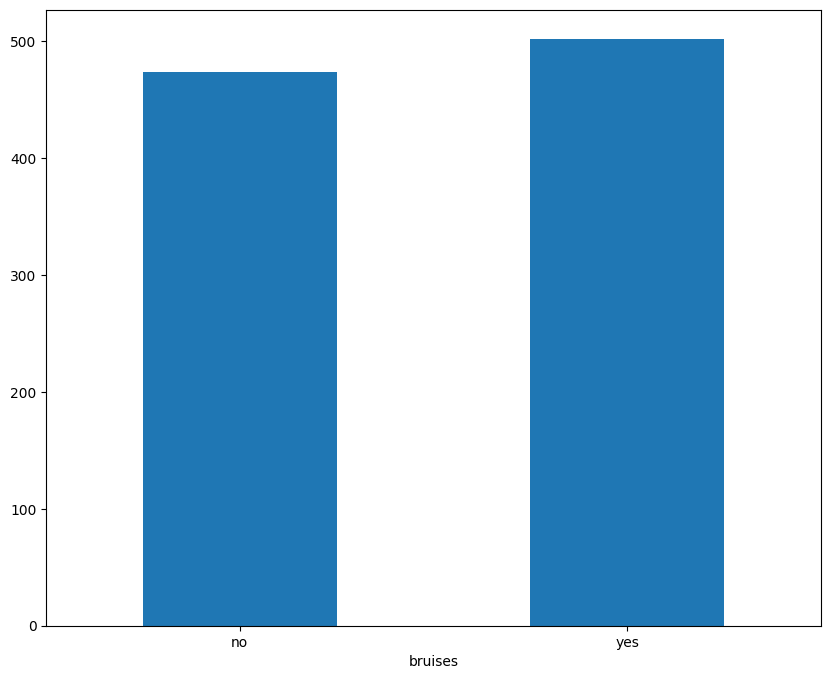

In [33]:
data['bruises'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

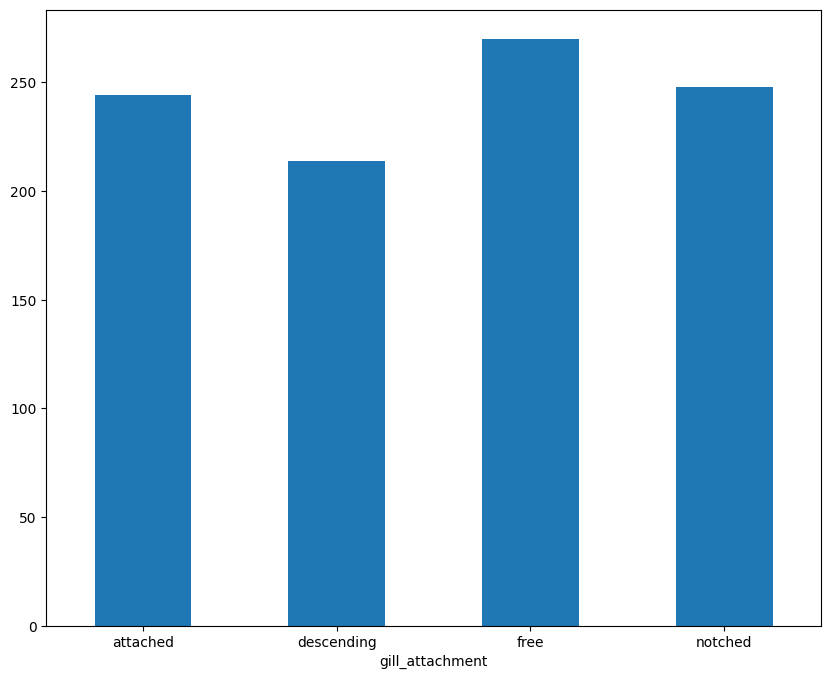

In [35]:
data['gill_attachment'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

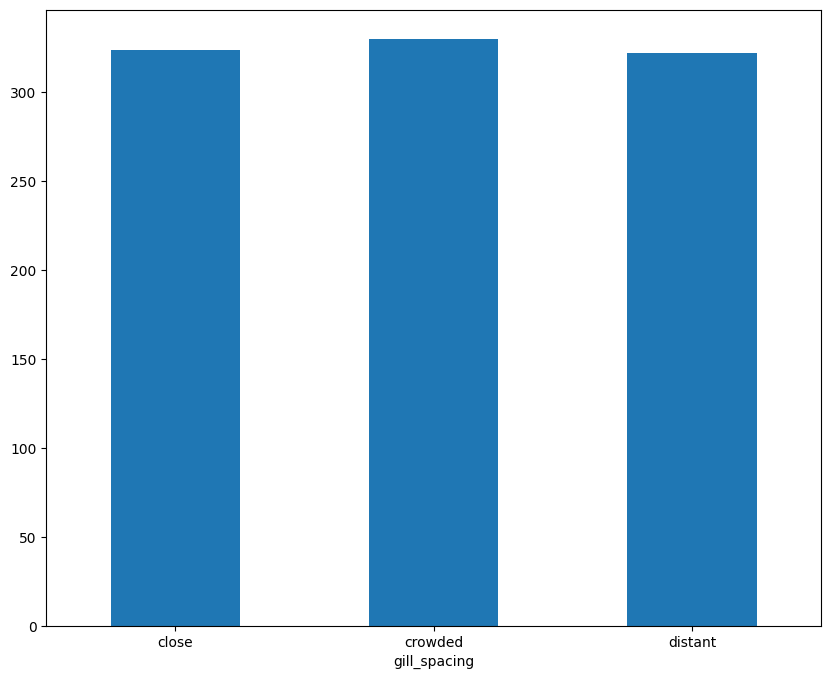

In [37]:
data['gill_spacing'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

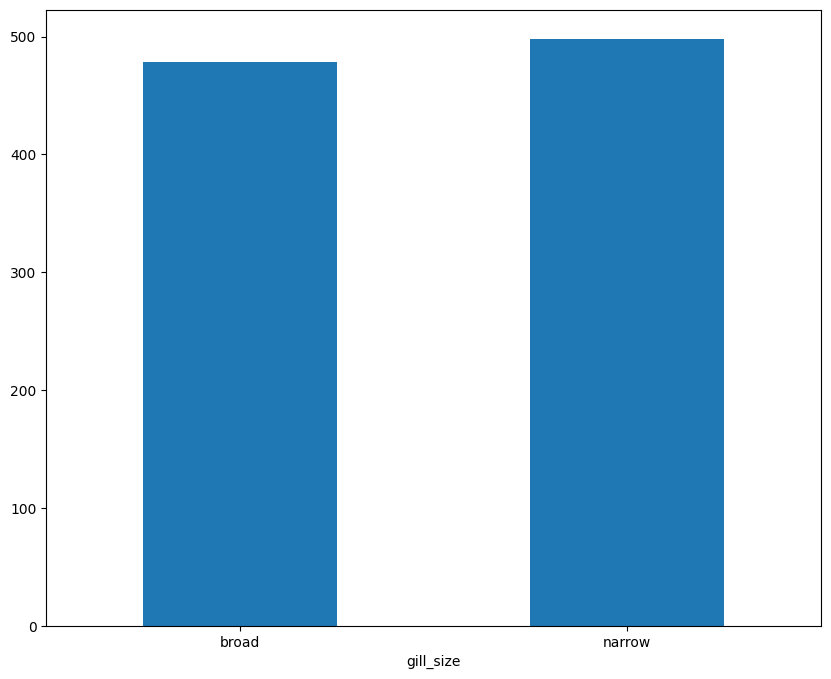

In [39]:
data['gill_size'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

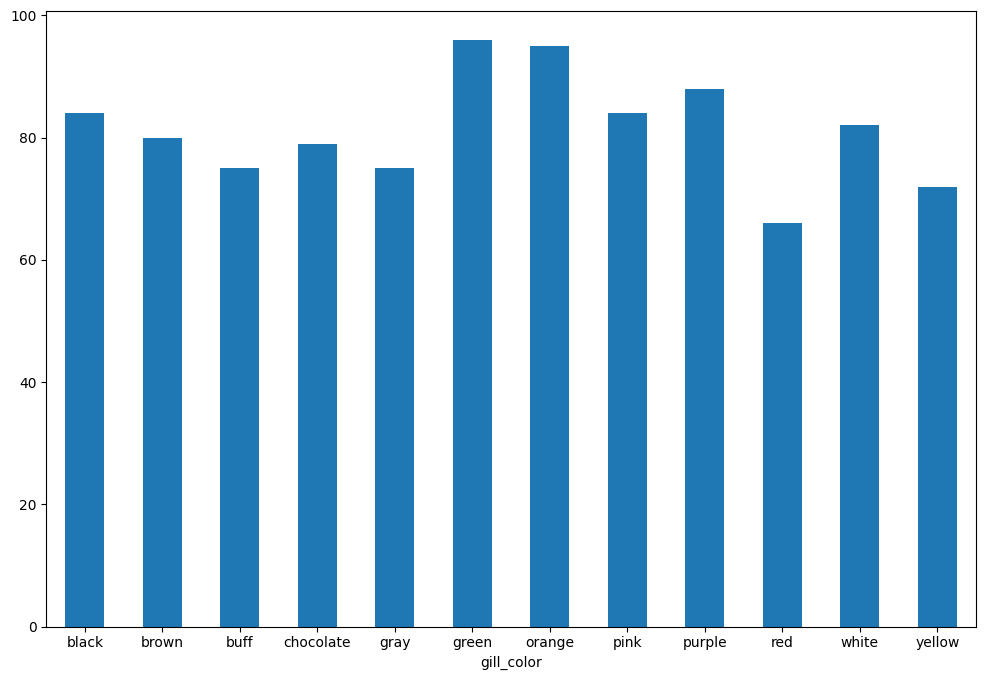

In [41]:
plt.figure(figsize = (12,8))
data['gill_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

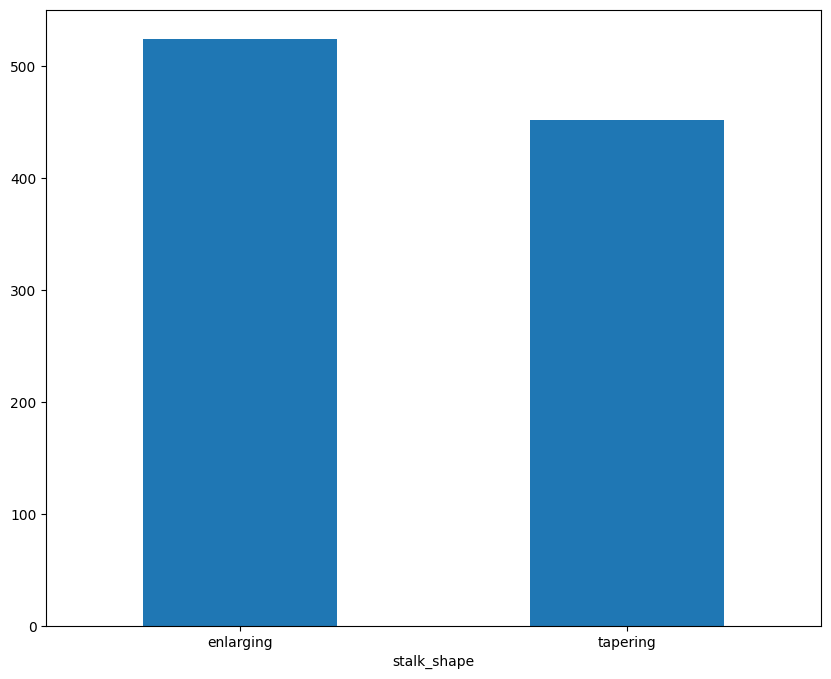

In [43]:
data['stalk_shape'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

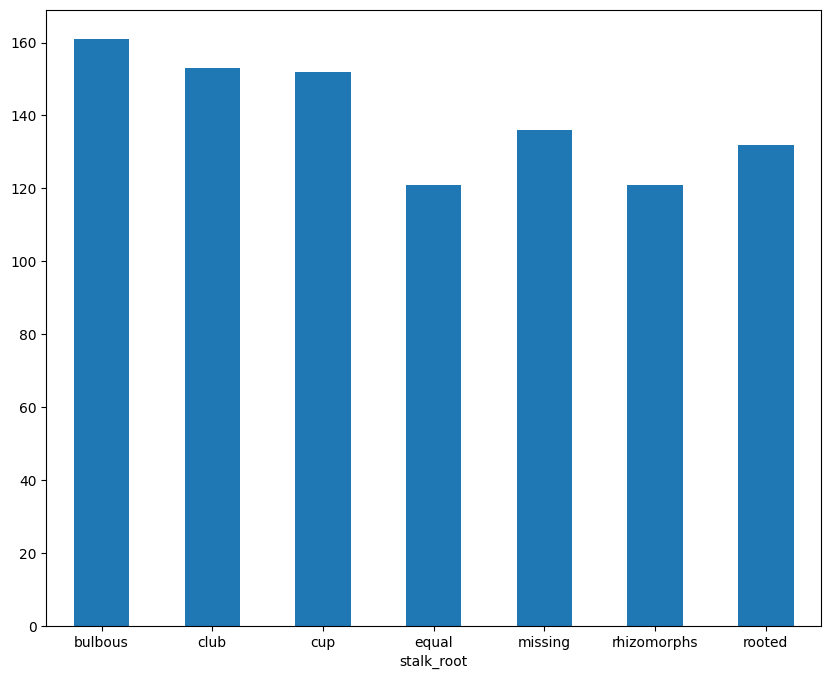

In [45]:
data['stalk_root'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

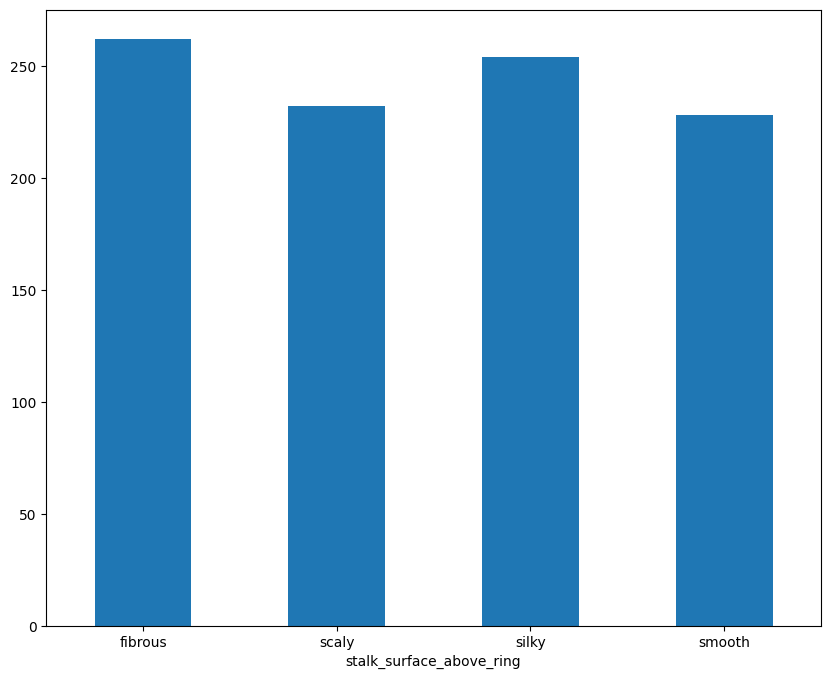

In [47]:
data['stalk_surface_above_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

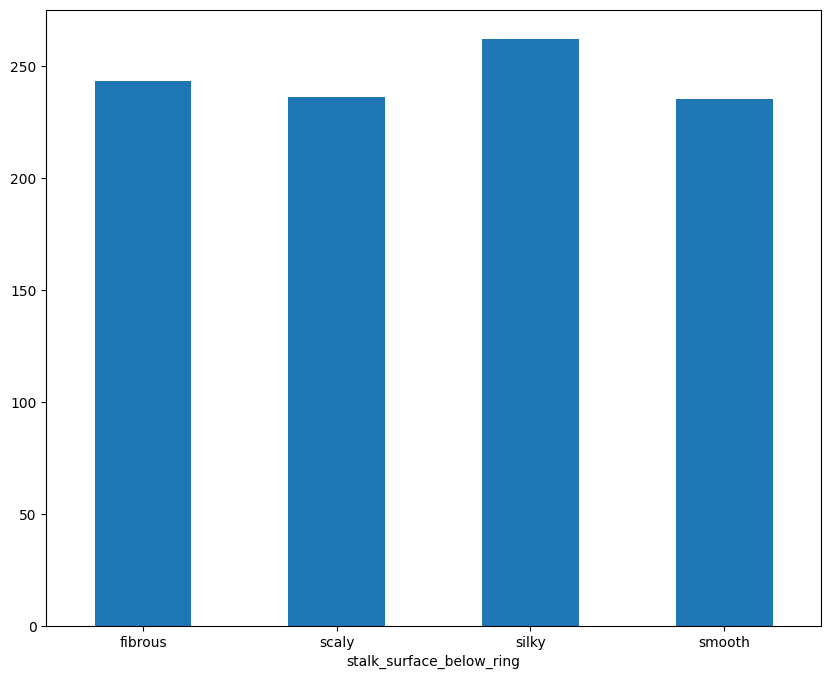

In [49]:
data['stalk_surface_below_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

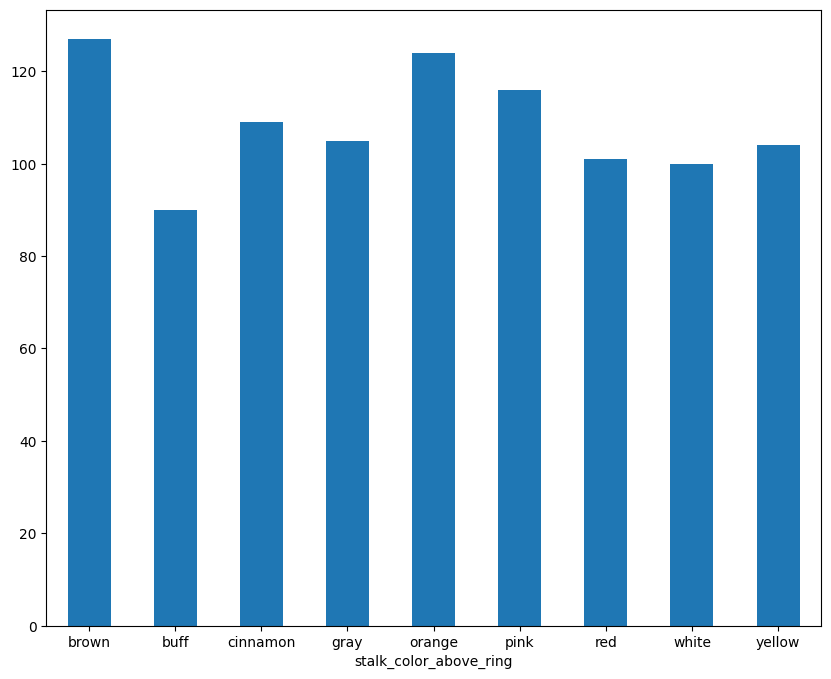

In [51]:
data['stalk_color_above_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

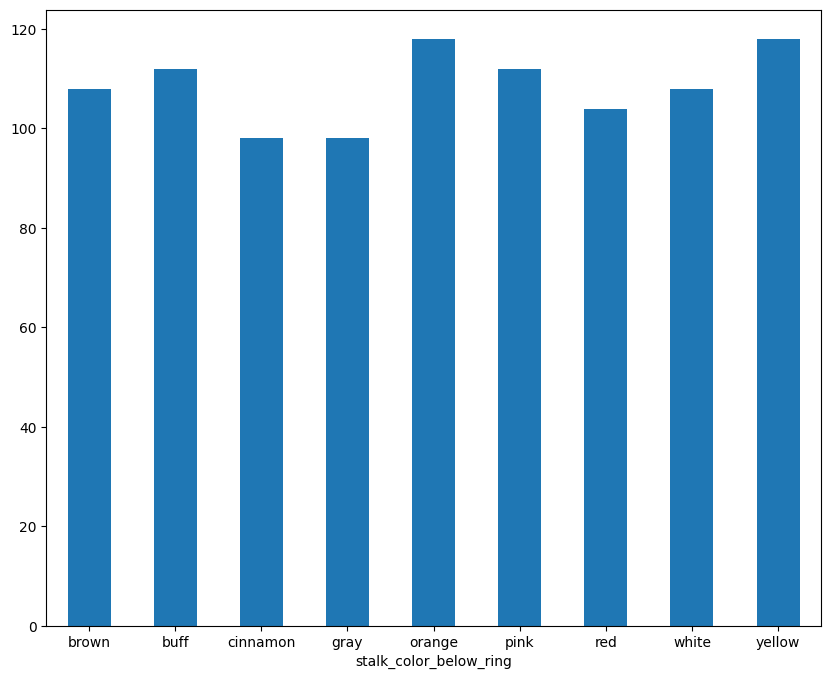

In [53]:
data['stalk_color_below_ring'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

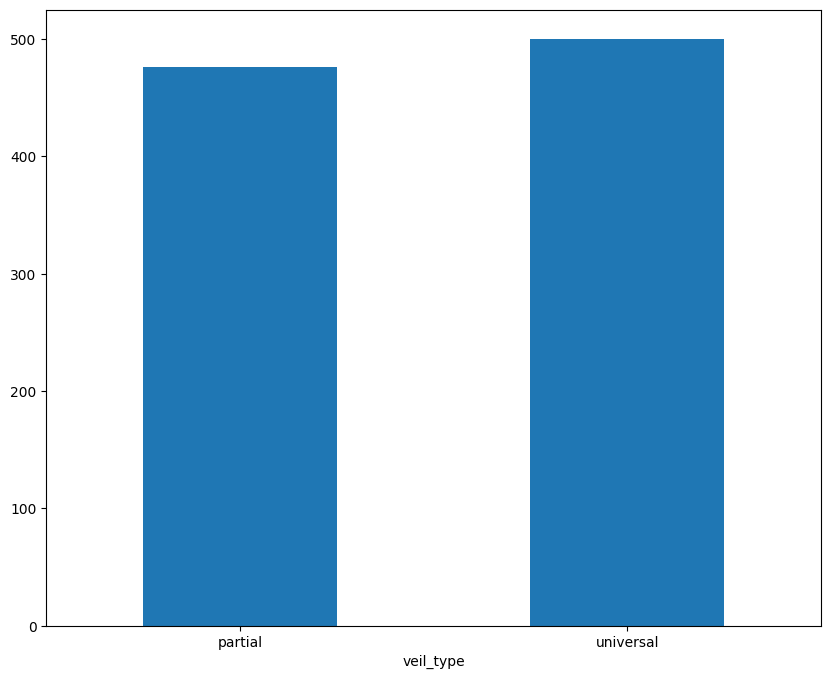

In [55]:
data['veil_type'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

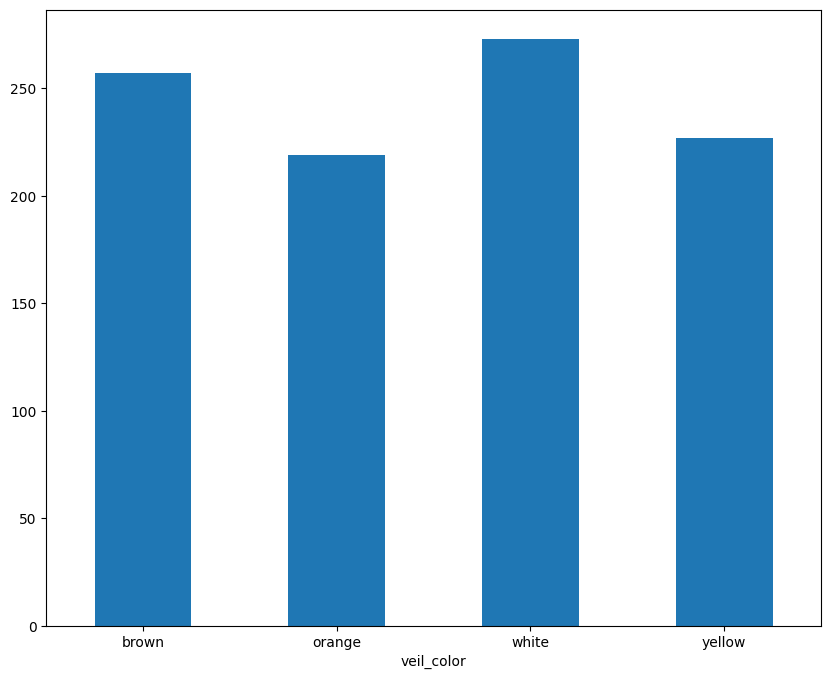

In [57]:
data['veil_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

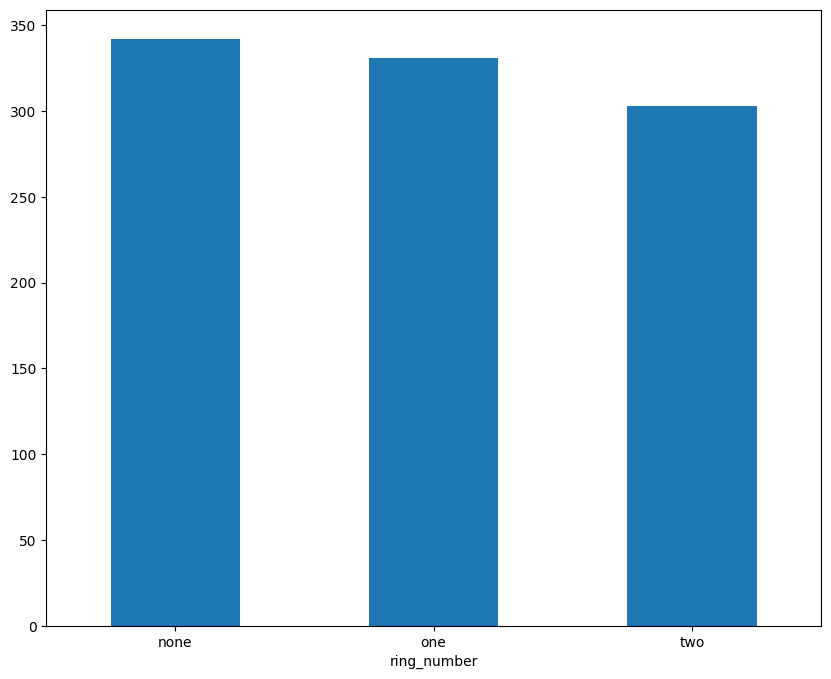

In [59]:
data['ring_number'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

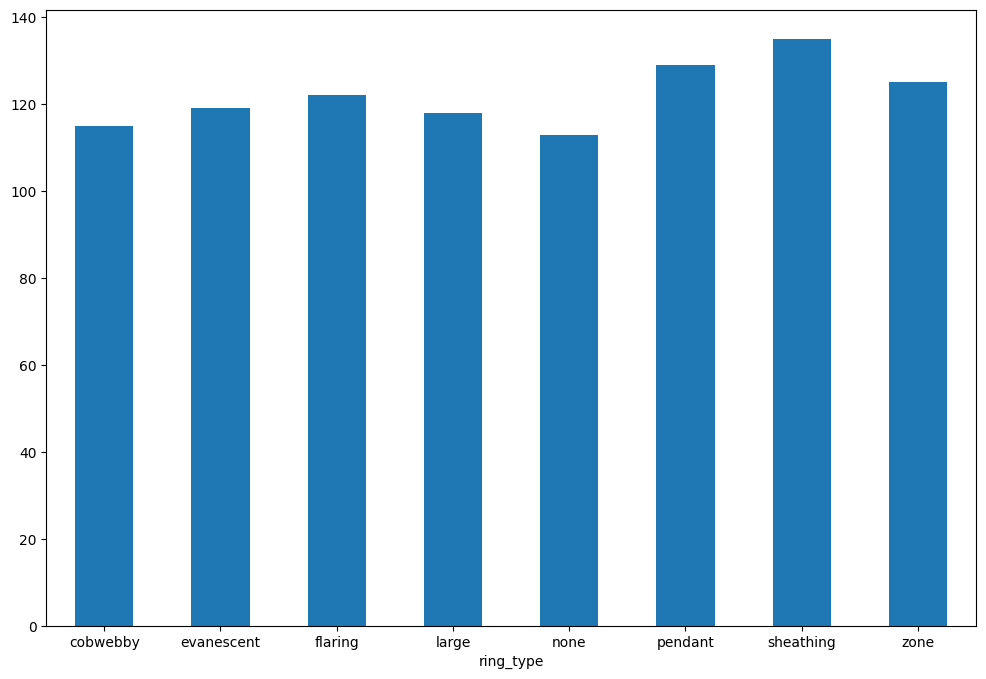

In [61]:
plt.figure(figsize = (12,8))
data['ring_type'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

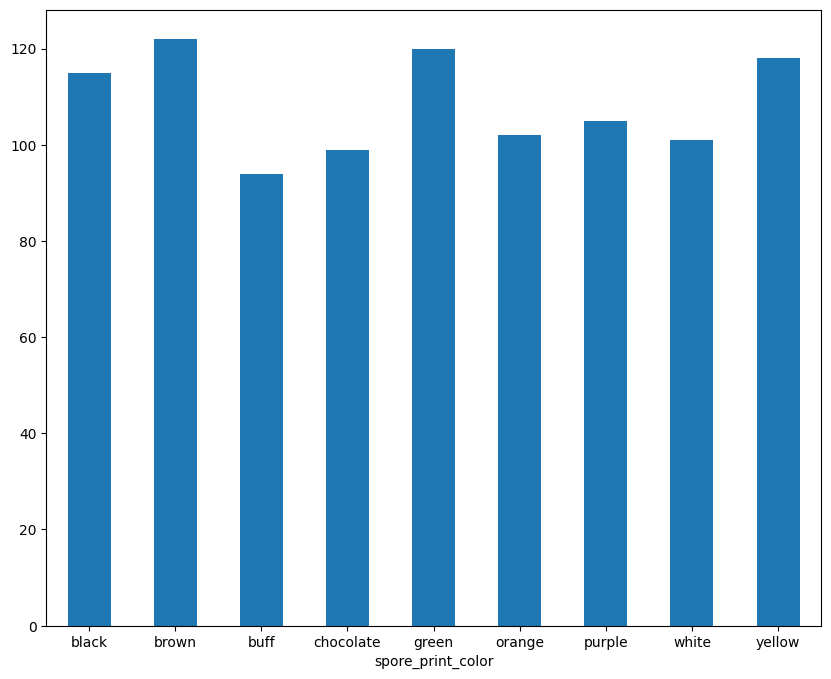

In [63]:
data['spore_print_color'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

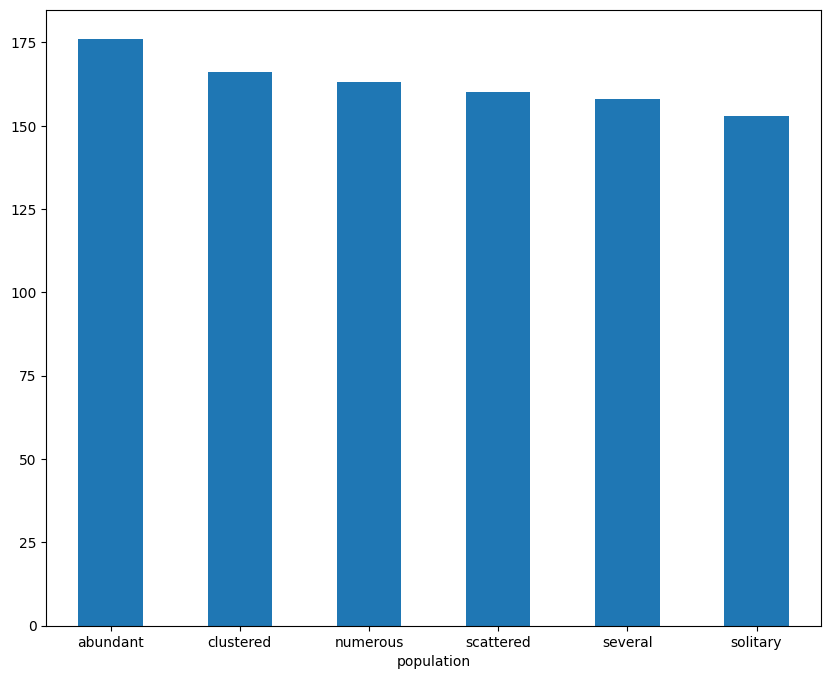

In [65]:
data['population'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

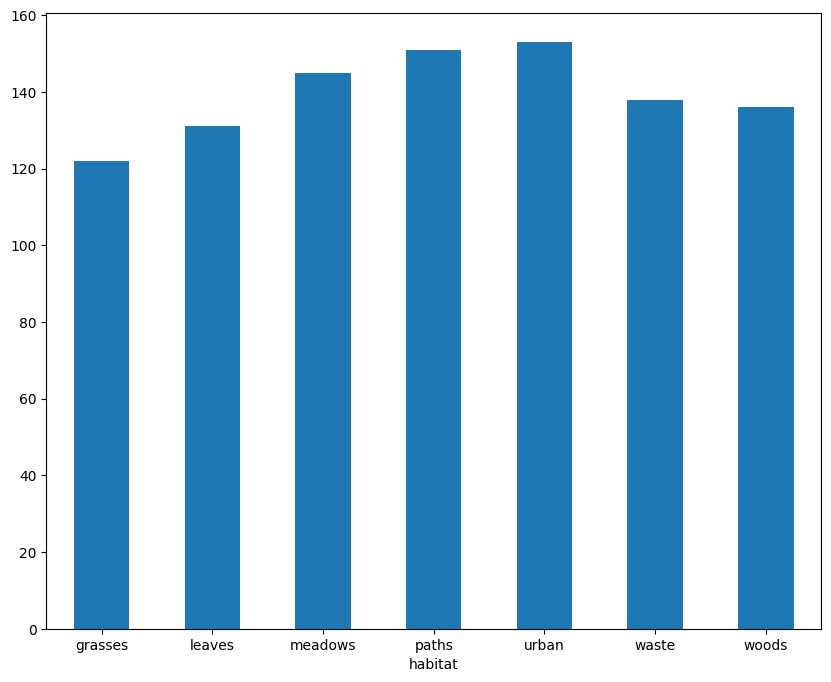

In [67]:
data['habitat'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

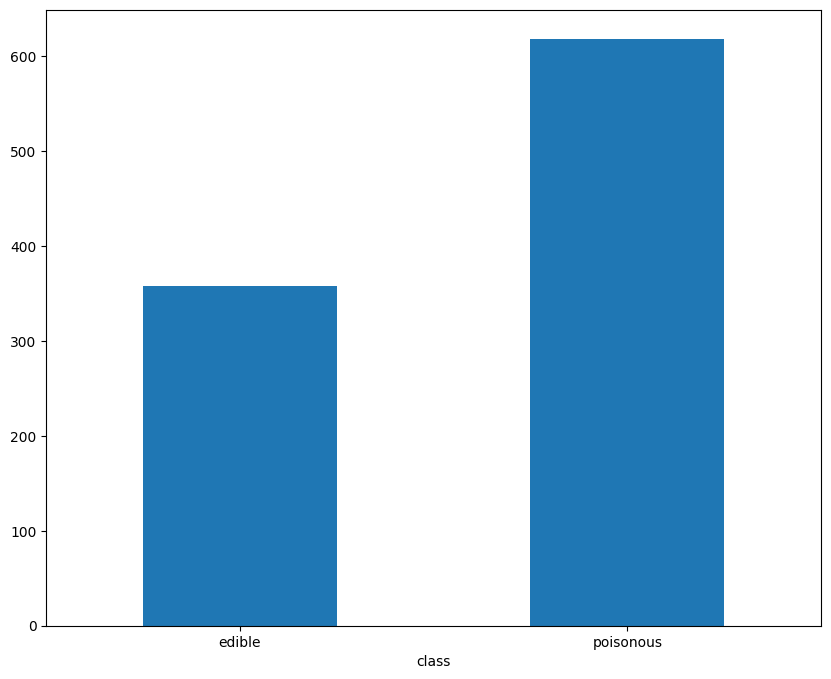

In [69]:
data['class'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.show()

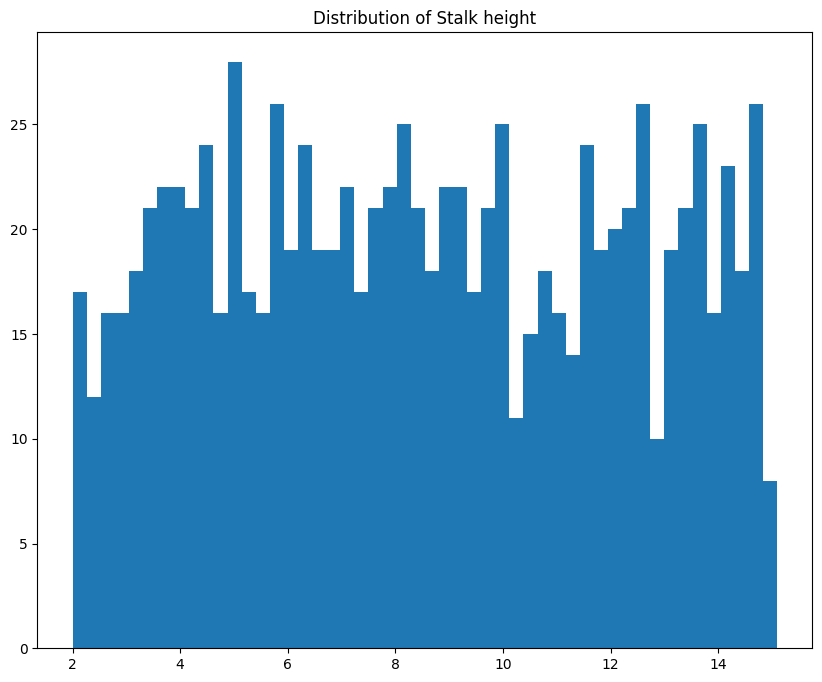

In [71]:
plt.hist(data['stalk_height'], bins = 50)
plt.title('Distribution of Stalk height');
plt.show()

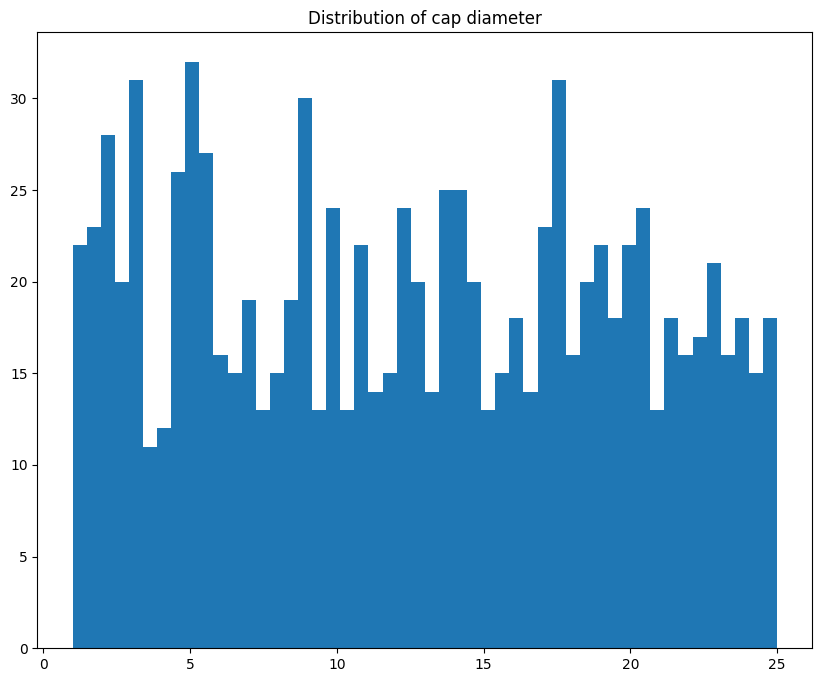

In [73]:
plt.hist(data['cap_diameter'], bins = 50)
plt.title('Distribution of cap diameter');
plt.show()

In [91]:
from sklearn.feature_selection import mutual_info_classif

encode_col = data.drop(['stalk_height', 'cap_diameter', 'class'], axis=1).columns
encoded_data = pd.get_dummies(data[encode_col], drop_first=True).astype(int)
data_encoded = data.drop(encode_col, axis=1).join(encoded_data)


In [93]:
X = data_encoded.drop(columns='class')
y = data_encoded['class']


In [95]:
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

In [97]:
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

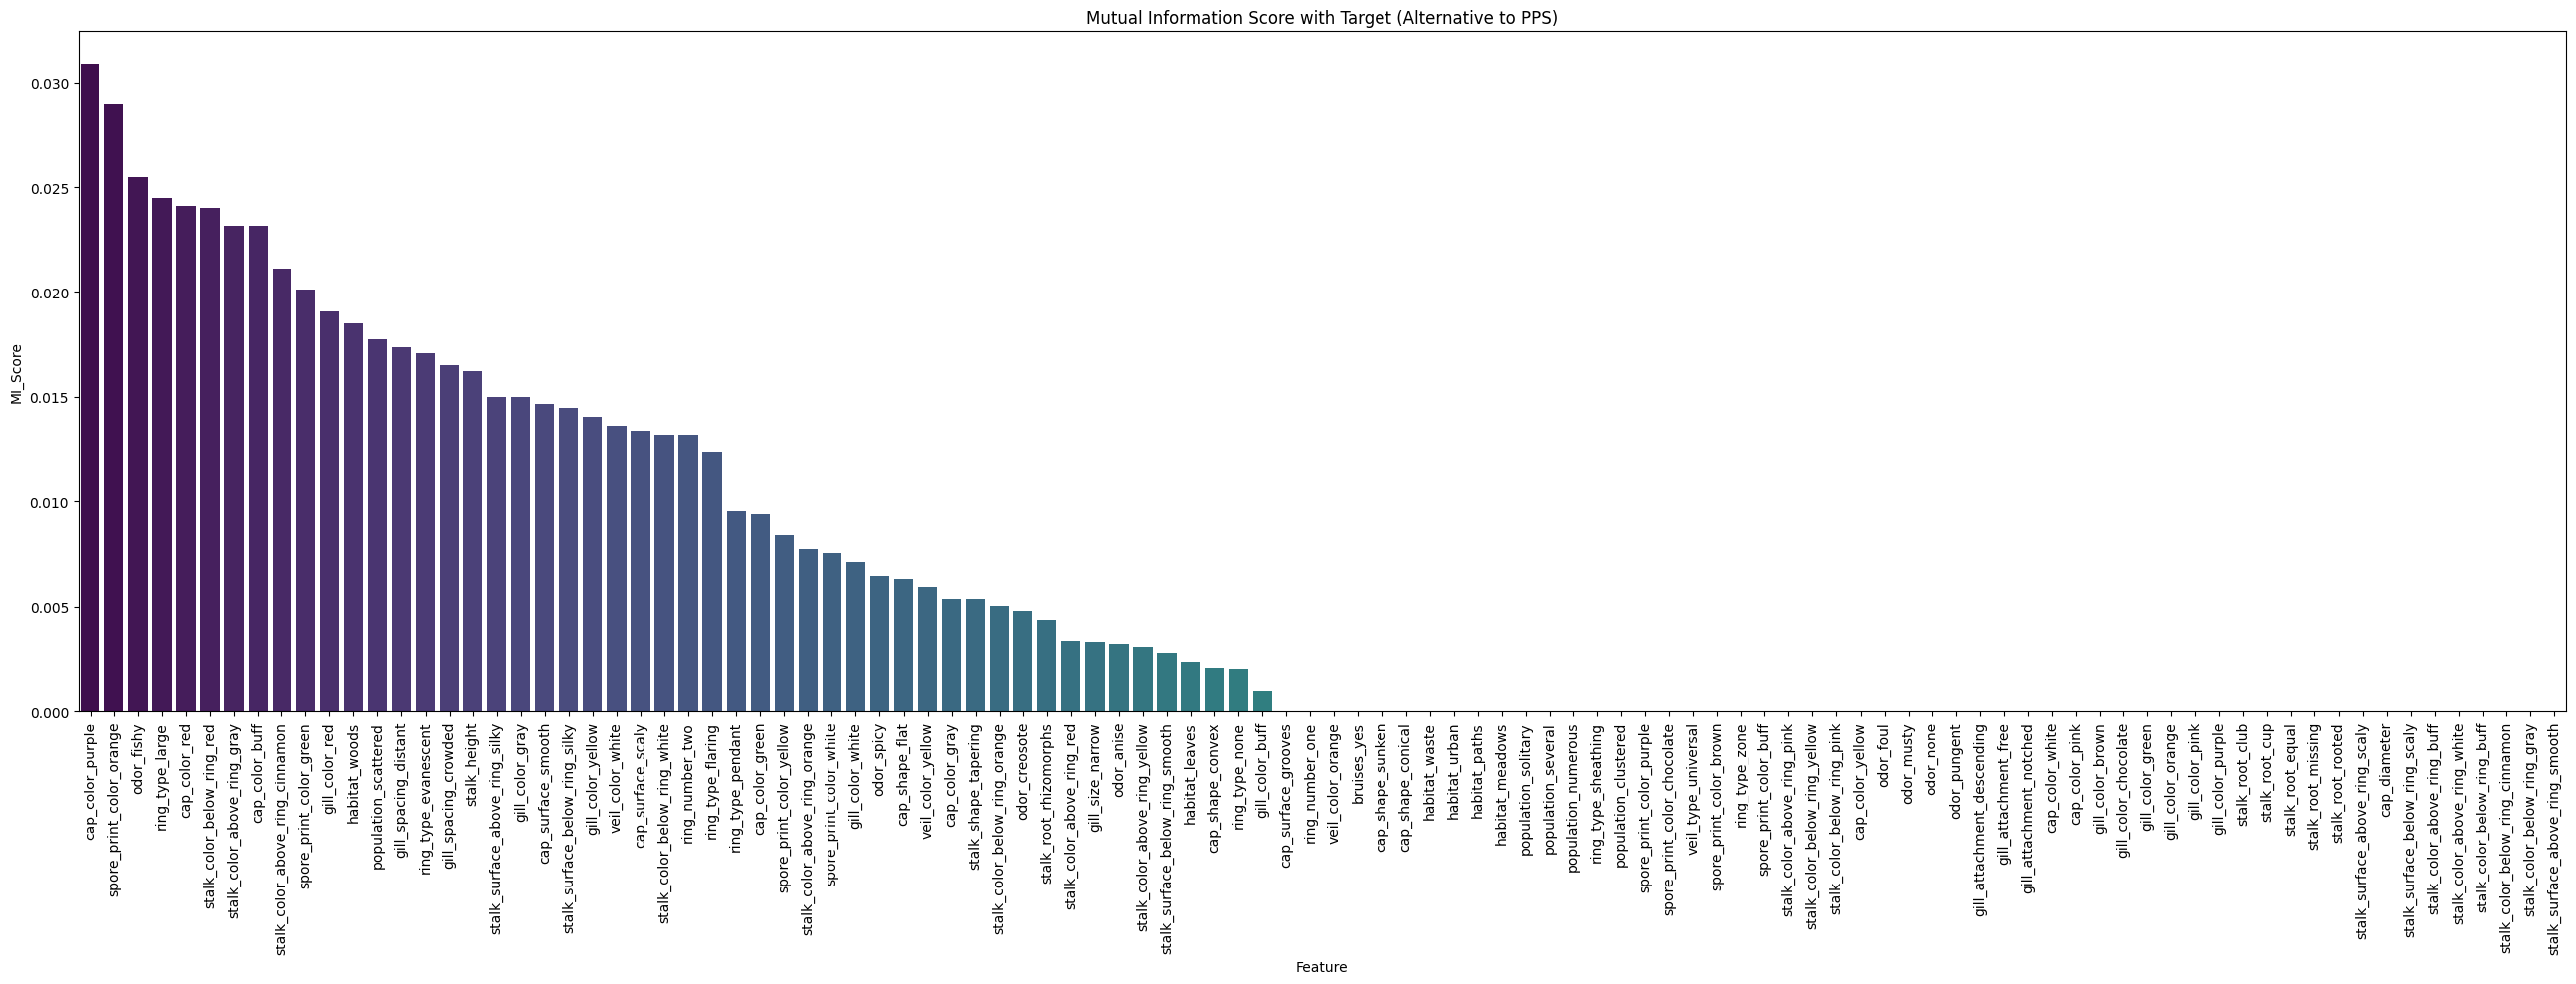

In [99]:
plt.figure(figsize=(26, 10))
sns.barplot(x='Feature', y='MI_Score', data=mi_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Mutual Information Score with Target (Alternative to PPS)')
plt.tight_layout()
plt.show()

In [101]:
data.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [103]:
sc = StandardScaler()
data[['stalk_height', 'cap_diameter']] = sc.fit_transform(data[['stalk_height', 'cap_diameter']])

In [105]:
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,1.553976,-1.080201
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,-1.235285,0.926435
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,0.143086,-0.772204
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,-0.891126,1.193403
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,1.489498,-0.007635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,1.214741,-0.373102
972,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,-1.289624,0.897769
973,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,1.245391,0.449841
974,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,-0.546816,0.129361


In [107]:
data['class'].value_counts()

class
poisonous    618
edible       358
Name: count, dtype: int64

In [109]:
x = data.drop('class', axis = 1)
y = data[['class']]

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [113]:
svm = SVC(kernel='linear', C = 0.2)

In [119]:
def train_model(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    print(f'Training Acccuracy: {model.score(x_train, y_train)}')
    print(f'Training Acccuracy: {model.score(x_test, y_test)}\n')
    print(classification_report(y_test, y_pred))
    return model


In [127]:
X = data.drop(columns='class')  
y = data['class']

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [129]:
trained_model = train_model(x_train, y_train, x_test, y_test, model)

Training Acccuracy: 1.0
Training Acccuracy: 0.6020408163265306



NameError: name 'y_pred' is not defined

In [131]:
svm1 = SVC(kernel='rbf', C = 0.1)

In [133]:
model1 = train_model(x_train , y_train, x_test, y_test, svm1)

Training Acccuracy: 0.6333333333333333
Training Acccuracy: 0.6326530612244898



NameError: name 'y_pred' is not defined

In [135]:
svm2 = SVC(kernel='poly', C = 0.1)

In [137]:
model2 = train_model(x_train , y_train, x_test, y_test, svm2)

Training Acccuracy: 0.6333333333333333
Training Acccuracy: 0.6326530612244898



NameError: name 'y_pred' is not defined

In [139]:
params = {
    'kernel' : ['poly', 'rbf', 'linear'],
    'C' : [0.1, 0.6, 1]
}

In [141]:
grid = GridSearchCV(SVC(), params, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.6, 'kernel': 'poly'}
Best Score: 0.641025641025641
